# Fluxo Óptico

## Definição

O fluxo óptico dscreve o movimento **aparente** de um objeto em um vídeo. Já o campo de movimento se refere ao movimento real dos objetos na cena. Naturalmente, existe uma forte correlação entre ambos, porém são conceitos diferentes. Observe abaixo um caso em que há difença

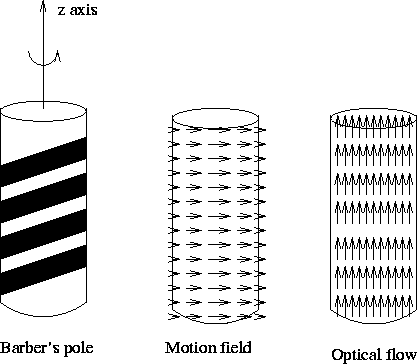

Quando olhamos o poste giratório do barbeiro, temos a impressão de que as listras estão subindo quando na verdade o movimento real é na horizontal em torno do eixo.

## O problema da abertura

Nós só percebemos o movimento nas direções perpendiculares ao gradiente de intensidade. O que isso quer dizer?

Veja a imagem abaixo e suponha que só observemos a região dentro do círculo vermelho: é impossível dizer se houve movimento! Por outro lado, se olharmos no interior do círculo azul, notaremos que houve movimento

<img src="perceptual-motion.jpg" width="250"/>

Por isso que com uma abertura pequena não conseguimos distinguir adequadamente a existência e a direção do movimento.

Voltaremos a esse problema em breve!

## Estimando o fluxo óptico

Dado um pixel em $(x_1,y_1)^t$ na imagem $I(t)$ no tempo $t$, como encontrar a nova posição $(x_2,y_2)^t$ desse mesmo pixel na imagem $I(t+1)$ no tempo $t+1$?

Suposições:
 - **Constância de cor**: as projeções na imagem do mesmo ponto no mundo real aparentam iguais em imagens consecutivas (constância na intensidade)
 
     $ I(x, y, t) = I(x+u, y+v, t+1)$, onde $(u,v)^t$ é o vetor deslocamento


 - **Movimentos pequenos**: pontos se deslocam pouco (aproximação de Taylor) 
 
  $ I(x+u, y+v, t+1) \approx I(x, y, t+1) + \frac{\partial I}{\partial x}u + + \frac{\partial I}{\partial y}v$
   

Combinando essas duas equações obtemos:
\begin{align}
     &I(x, y, t+1) + \frac{\partial I}{\partial x}u + \frac{\partial I}{\partial y} - I(x, y, t) \approx 0 \\
     &\Leftrightarrow \underbrace{\left[ I(x, y, t+1) - I(x, y, t) \right]}_{\textrm{diferença nos frames}}
         + \underbrace{\frac{\partial I}{\partial x}}_{\textrm{derivada ao longo do eixo x}} u
         + \underbrace{\frac{\partial I}{\partial y}}_{\textrm{derivada ao longo do eixo y}} v \approx 0 \\
    &\Leftrightarrow I_t + I_x u + I_y v \approx 0 \\
    &\Leftrightarrow  I_t + (u,v) \nabla I \approx 0
\end{align}
onde $\nabla I = \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right)^t$ é o vetor gradiente de intensidade.

No limite em que $ \Vert (u,v)^t \Vert^2 \rightarrow 0 $, a equação acima se torna exata: $(u,v)^t \rightarrow (\partial x, \partial y)^t$.

### Revisitando o problema da abertura

Lembre: o que queremos resolver?

Queremos encontrar o deslocamento $(u,v)^t$, assim descobrimos de quanto foi o movimento aparente do pixel em $(x_1,y_1)^t$.

No entanto, repare que precisamos descobrir 2 valores, $u$ e $v$, e temos apenas 1 equação. Esse é um sistema subdeterminado!

Por isso que existe a problema da abertura, só conseguimos determinar um dos valores do vetor $(u,v)^t$, aquele normal à borda e ainda permanece um grau de liberdade que necessita de outra equação para determinarmos.

<img src="aperture-problem.jpg" width="450"/>


### Método de Lucas & Kanade

Precisamos arranjar mais uma equação e para isso imposmos 1 restrição adicional: 

 - **Coerência espacial**: pontos vizinhos se movem de forma similar (movimento locamente suave)

Nesse momento que entra o método de Lucas & Kanade: em uma janela de tamanho $w \times w$ ao redor do ponto $(x,y)^t$, supomos o deslocamento $(u,v)^t$ constante. Dessa forma, geramos um conjunto de $w^2$ equações com $(u,v)^t$ amarrado e agora temos um sistema sobredeterminado! Podemos resolver para $(u,v)^t$ minimizando o erro de estimação!

Escrevendo o sistema de $w^2$ equações em forma matricial:
\begin{align}
    \underbrace{
        \begin{pmatrix}
            I_x(p_1) & I_y(p_1) \\
            I_x(p_2) & I_y(p_2) \\
            \vdots   & \vdots   \\
            I_x(p_{w^2}) & I_y(p_{w^2})
          \end{pmatrix}
      }_A
      \underbrace{
          \begin{pmatrix}
          u \\
          v
          \end{pmatrix}
      }_d
      +
      \underbrace{
          \begin{pmatrix}
          I_t(p_1) \\
          I_t(p_2) \\
          \vdots   \\
          I_t(p_{w^2})
          \end{pmatrix}
      }_b
      = 0
\end{align}

O nosso problema de otimização é então: $ \min_d \Vert Ad + b \Vert^2 $.

Lembrem de algebra linear, a solução para o problema $Ax = b$ é a pseudo-inversa $(A^t A)^{-1} A b$. Por quê?

Queremos minimizar:
\begin{align}
    &\min_x \Vert Ax - b \Vert^2 \\
    &\Leftrightarrow \min_x  \left( Ax - b \right)^t \left( Ax - b \right) \\
    &\Leftrightarrow \min_x  x^t A^t A x - 2b^t A x + b^t b
\end{align}

Derivamos em relação a $x$ e igualamos a 0:
\begin{align}
    & \frac{d}{dx} \left( x^t A^t A x -2b^t A x + b^t b \right) = 0 \\
    &\Rightarrow 2 A^t A x - 2b^t A = 0 \\
    &\Leftrightarrow A^t A x = A^t b \qquad \textrm{(equações normais)} \\
    &\Leftrightarrow x = (A^t A)^{-1} A b
\end{align}


Quem é $A^t A$?

\begin{align}
        \begin{pmatrix}
            I_x(p_1) & \cdots & I_x(p_{w^2}) \\
            I_y(p_1) & \cdots & I_y(p_{w^2}) \\
          \end{pmatrix}
                  \begin{pmatrix}
            I_x(p_1) & I_y(p_1) \\
            I_x(p_2) & I_y(p_2) \\
            \vdots   & \vdots   \\
            I_x(p_{w^2}) & I_y(p_{w^2})
          \end{pmatrix} 
          =
          \begin{pmatrix}
            \sum I_x I_x & \sum I_x I_y \\
            \sum I_x I_y & \sum I_y I_y \\
          \end{pmatrix}
\end{align}

Inversão de matrizes sempre é um processo delicado e problemático.
Intuitivamente, quais são os pixels para os quais melhor conseguimos enxergar o movimento?

Veja novamente a imagem:
<img src="perceptual-motion-corner.jpg" width="250"/>

A quina (circulada em amaralo) é aonde conseguimos enxergar o movimento nas duas direções. Isso nos lembra do detector de Harris! Queremos pontos bem distintos para poder resolver bem essa equação.

Um olhar mais análitico nos permite enxergar essa semelhança mais intimamente a partir dos autovalores da matriz $A^t A$: 

 - Os autovalores $\lambda_1$ e $\lambda_2$ não podem ser muito pequenos (se qualquer um deles for zero a matriz $A^t A$ não invertível, lembra?) -- situação de região plana
 
 - A razão $\lambda_1/\lambda_1$ não deve ser muito pequena senão será mal-condicionada -- situação de região de borda

 
 <img src="http://media5.datahacker.rs/2019/07/132-1024x730.png" width="650"/>
